# **Titanic Data Analysis**

This project focuses on analysis data from a very popular dataset - The Titanic. The model will predict if a given passenge survived or not.

The first step is importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\SUCHITRA\Desktop\Deep Learning\Titanic Kaggle\train.csv")


The iniitial exploaratory data analysis is performed

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Creating a Correlation heatmap to compare the relation of various parameters of the data

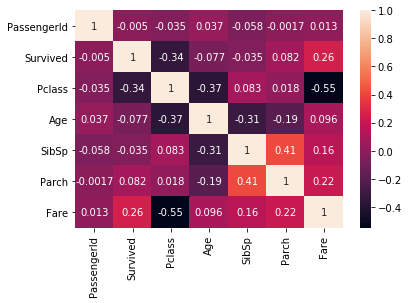

In [8]:
sns.heatmap(df.corr(),annot=True)

**Joint plot to see the realtion between the column Pclass and Age**

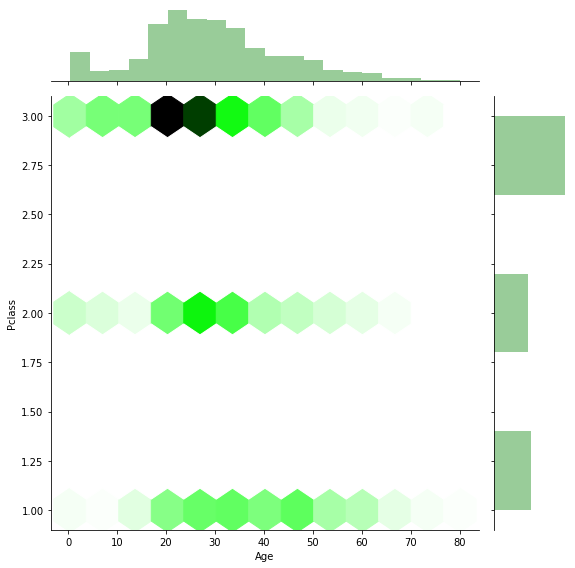

In [9]:
sns.jointplot(x="Age", y="Pclass", data=df,kind="hex",height=8,color="g") 
plt.show()

**From the above analysis, we can see that most of the passengers are mid-aged and median can be used to find the missing age values**

In [10]:
age_group = df.groupby('Pclass')["Age"]
print (age_group.median())

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [11]:
df.loc[df.Age.isnull(),'Age']=df.groupby("Pclass").Age.transform('median')

In [12]:
print(df["Age"].isnull().sum())

0


The cabin variable has too many missing values, and hence can be dropped

In [13]:
df.drop('Cabin', axis='columns')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
from statistics import mode
df["Embarked"] = df["Embarked"].fillna(mode(df["Embarked"]))

**Separating the input variabe and the target variable**

In [15]:
df = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Embarked','Age']]

In [16]:
X = df.drop('Survived', axis='columns')

In [17]:
y = df.Survived

**One Hot encoding for feature encoding**

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough')

column_trans.fit_transform(X)

array([[ 0.,  1.,  0., ...,  1.,  3., 22.],
       [ 1.,  0.,  1., ...,  0.,  1., 38.],
       [ 1.,  0.,  0., ...,  1.,  3., 26.],
       ...,
       [ 1.,  0.,  0., ...,  1.,  3., 24.],
       [ 0.,  1.,  1., ...,  0.,  1., 26.],
       [ 0.,  1.,  0., ...,  0.,  3., 32.]])

**Creating the Logistic regression pipline and checking its accuracy**

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_trans, logreg)

from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7912560416797438